# **Praktikum 2**

### Konsep K-Means untuk klasterisasi data

Import Library

In [54]:
# Mengimpor modul pyplot dari pustaka Matplotlib yang dimana memiliki fungsi-fungsi Matplotlib untuk membuat dan menampilkan plot.
import matplotlib.pyplot as plt

# mengimpor pustaka Seaborn dengan alias sns yang dimana berfungsi untuk memperbaiki tampilan plot Matplotlib dengan tema dan warna yang lebih menarik. Pernyataan sns.set() digunakan untuk mengatur gaya tampilan default untuk plot yang akan dibuat.
import seaborn as sns; sns.set()

# Mengimpor pustaka NumPy ke dalam program yang dimana library ini berfungsi untuk komputasi numerik dalam pengolahan data dan array.
import numpy as np

### **Pengantar k-Means**

Nanti akan muncul tampilan seperti di bawah ini:


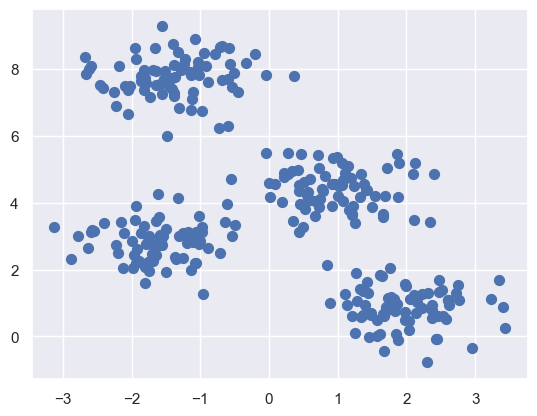

In [55]:
# mengimpor fungsi make_blobs dari pustaka scikit-learn (sklearn) yang berfungsi untuk membuat data sampel berbentuk kelompok (blobs) yang digunakan dalam eksperimen klastering.
from sklearn.datasets import make_blobs

penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

# Pemanggilan fungsi make_blobs untuk membuat data sampel.
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# Membuat scatter plot (plot titik) dari data X menggunakan Matplotlib. Posisi horizontal (X) dan posisi vertikal (Y) dari setiap sampel diambil dari X[:, 0] dan X[:, 1]. Parameter s digunakan untuk mengatur ukuran titik pada plot (50 dalam hal ini)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [56]:
# Mengimpor modul Berfungsi untuk mengelompokkan data menjadi kelompok-kelompok berdasarkan kemiripan fitur.
from sklearn.cluster import KMeans

# Membuat objek KMeans dengan menginisialisasi algoritma klastering. n_clusters=4 mengatur jumlah kluster yang ingin Anda hasilkan, dalam hal ini, ada empat kluster yang akan dicari.
kmeans = KMeans(n_clusters=4)

# Melatih model KMeans pada data yang ada dalam matriks X. Proses pelatihan ini akan mengelompokkan data ke dalam kluster sesuai dengan parameter yang telah diatur.
kmeans.fit(X)

# Memprediksi kluster mana yang akan ditugaskan kepada setiap titik data dalam matriks X. Hasil prediksi akan disimpan dalam y_kmeans, yang akan berisi label kluster untuk setiap titik data dalam X.
y_kmeans = kmeans.predict(X)

Nanti akan muncul tampilan seperti di bawah ini:


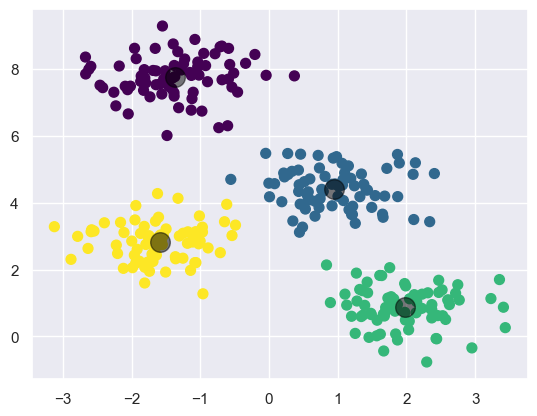

In [57]:
penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

# Membuat scatter plot dari data.
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Mengambil pusat kluster dari model K-Means yang telah dilatih sebelumnya. 
centers = kmeans.cluster_centers_

# Menambahkan titik-titik yang mewakili pusat kluster ke dalam plot. 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### **Algoritma Expectation-Maximization**

Nanti akan muncul tampilan seperti di bawah ini:


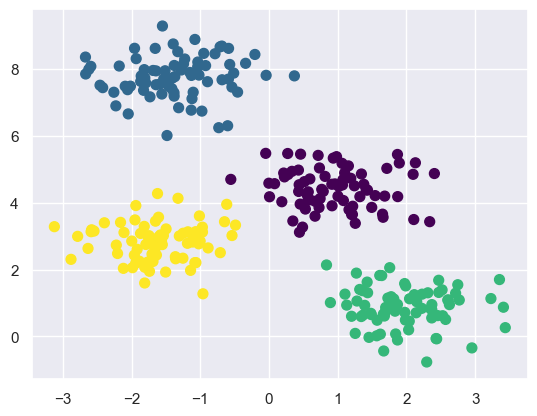

In [58]:
# Mengimpor modul pairwise_distances_argmin dari pustaka scikit-learn (sklearn)berfungsi untuk menemukan indeks dari pusat kluster terdekat dari setiap sampel dalam data.
from sklearn.metrics import pairwise_distances_argmin

penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

# Menemukan pusat-pusat kluster dan label-label kluster untuk data X. Data X diharapkan berisi fitur-fitur yang akan dikelompokkan menjadi 4 kluster. 
centers, labels = find_clusters(X, 4)

# Membuat scatter plot dari data X. Pada plot ini, sumbu x menggunakan kolom pertama dari X (X[:, 0]) dan sumbu y menggunakan kolom kedua dari X (X[:, 1]). 
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### **Perubahan Random**

Nanti akan muncul tampilan seperti di bawah ini:


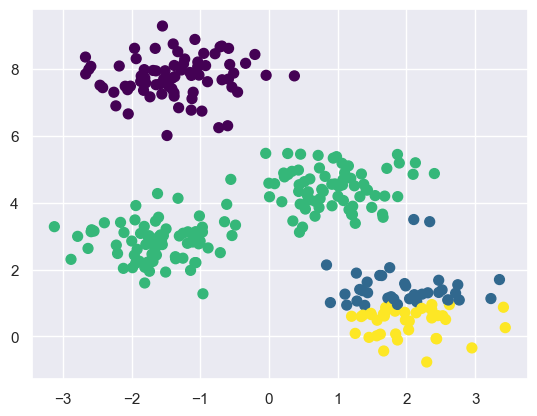

In [59]:
penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

# Menemukan pusat-pusat kluster dalam data X dengan menggunakan algoritma klastering K-Means. 
centers, labels = find_clusters(X, 4, rseed=0)

# Membuat plot sebar (scatter plot) dari data X. X[:, 0] dan X[:, 1] mengambil kolom pertama dan kedua dari data X sebagai koordinat x dan y.
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### **Optimalisasi Jumlah Klaster**

Nanti akan muncul tampilan seperti di bawah ini:


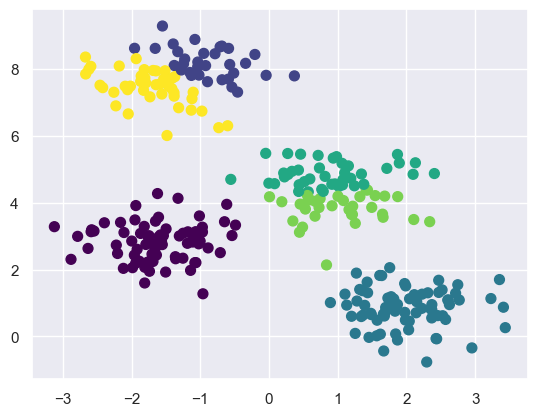

In [60]:
penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

# Pembuatan objek dari kelas KMeans dari pustaka scikit-learn (sklearn).
labels = KMeans(6, random_state=0).fit_predict(X)

# Membuat plot sebar (scatter plot) dari data X. X[:, 0] dan X[:, 1] mengambil kolom pertama dan kedua dari data X sebagai koordinat x dan y.
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### **Batas Klaster yang Tidak Selalu Linier**

In [61]:
# Mengimpor fungsi make_moons dari pustaka scikit-learn (sklearn) berfungsi untuk menghasilkan dataset sintetis yang berisi dua bulan sabit (moon-shaped clusters) yang bergeser secara acak.
from sklearn.datasets import make_moons

# Pemanggilan fungsi make_moons yang menghasilkan dataset sintetis.
X, y = make_moons(200, noise=.05, random_state=0)

Nanti akan muncul tampilan seperti di bawah ini:


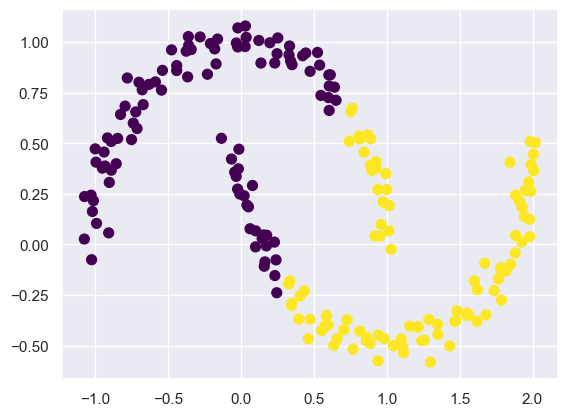

In [62]:
penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

# Pembuatan objek dari kelas KMeans dari pustaka scikit-learn (sklearn).
labels = KMeans(2, random_state=0).fit_predict(X)

# Membuat plot sebar (scatter plot) dari data X. X[:, 0] dan X[:, 1] mengambil kolom pertama dan kedua dari data X sebagai koordinat x dan y.
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Nanti akan muncul tampilan seperti di bawah ini:


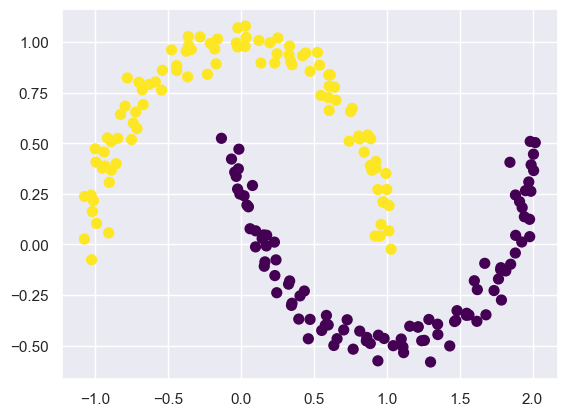

In [76]:
penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

# Mengimpor modul SpectralClustering dari pustaka scikit-learn (sklearn), merupakan teknik klastering yang berdasarkan analisis spektral dan digunakan untuk mengelompokkan data dalam struktur jaringan.
from sklearn.cluster import SpectralClustering

# Membuat model SpectralClustering dengan beberapa parameter.
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')

# Pelatihan model pada dataset X dan mengeluarkan hasil prediksi kelompok atau kluster, yang kemudian disimpan dalam variabel labels.
labels = model.fit_predict(X)

# Membuat plot sebar (scatter plot) dari data X. X[:, 0] dan X[:, 1] mengambil kolom pertama dan kedua dari data X sebagai koordinat x dan y.
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### **Contoh Kasus 1: Karakter Angka**

In [64]:
# Mengimpor fungsi load_digits dari modul datasets di pustaka scikit-learn (sklearn).
from sklearn.datasets import load_digits

# Memanggil fungsi load_digits() untuk memuat dataset gambar digit. 
digits = load_digits()

# Mengakses atribut data dari objek digits dan kemudian mengakses atribut shape.
digits.data.shape

(1797, 64)

In [65]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Nanti akan muncul tampilan seperti di bawah ini:


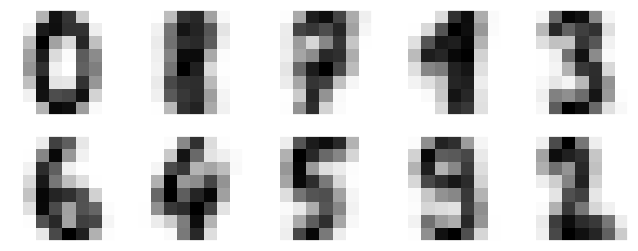

In [66]:
penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

# Membuat plot dari pusat-pusat (centroids) dari kelompok-kelompok yang dihasilkan oleh algoritma K-Means.
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [67]:
# Menghasilkan label klasifikasi dari sekelompok data yang telah di-cluster menggunakan algoritma K-Means. 
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [68]:
# Menghitung akurasi dari hasil klastering yang diperoleh (labels) dengan nilai sebenarnya atau target yang sesungguhnya (digits.target) menggunakan metrik akurasi.
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7918753478018921

Nanti akan muncul tampilan seperti di bawah ini:


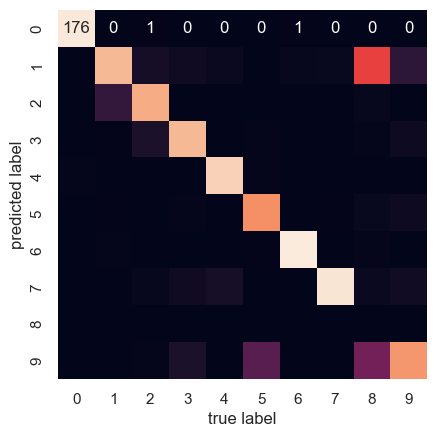

In [69]:
penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [70]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

### **Studi Kasus 2: Kompresi Citra**

Nanti akan muncul tampilan seperti di bawah ini:


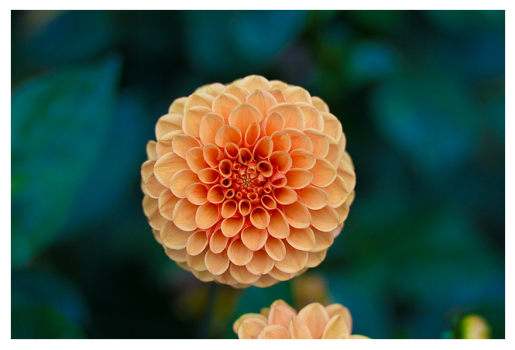

In [71]:
penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [72]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [73]:
penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Nanti akan muncul tampilan seperti di bawah ini:


Nanti akan muncul tampilan seperti di bawah ini:


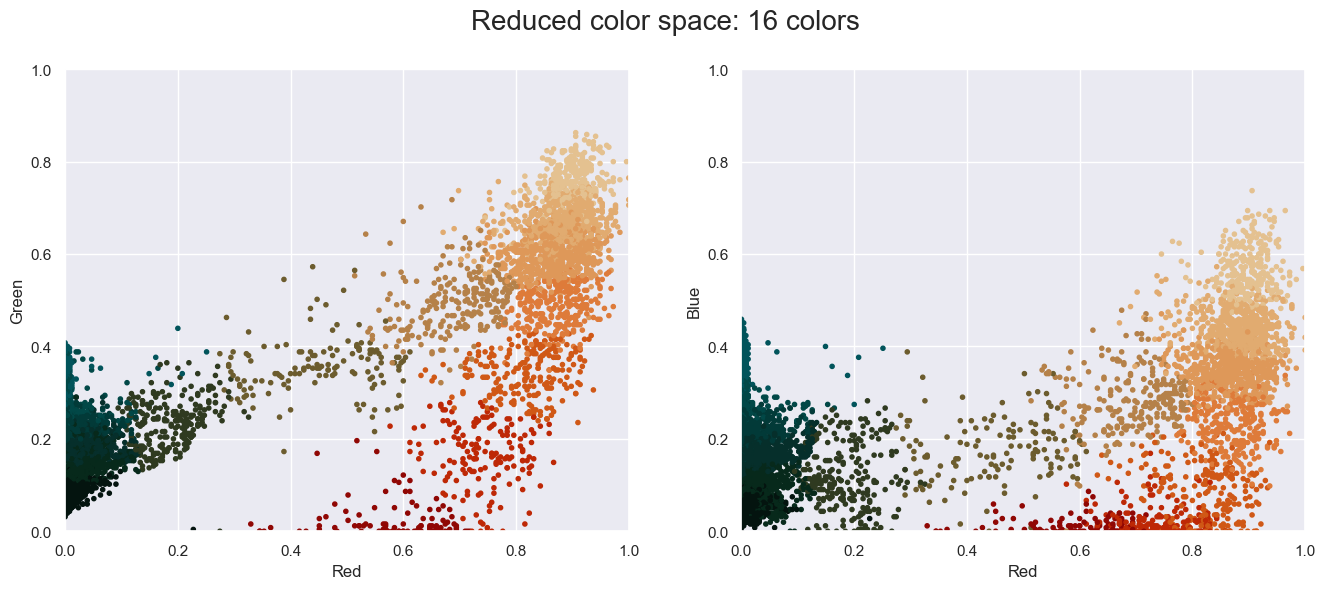

In [74]:
penjabaran = "Nanti akan muncul tampilan seperti di bawah ini:"
print(penjabaran)

import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")